In [1]:
from qiskit import *

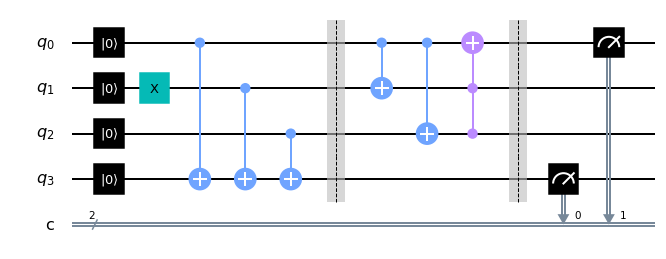

In [2]:
qc = QuantumCircuit(4, 2)

qc.reset(range(4))
qc.x(1)
# qc.x(2)

# Sum
qc.cx(0, 3)
qc.cx(1, 3)
qc.cx(2, 3)
qc.barrier()

# Carry
qc.cx(0, 1)
qc.cx(0, 2)
qc.ccx(1, 2, 0)
qc.barrier()
qc.measure([3, 0], [0, 1])

# qc.barrier()

qc.draw('mpl')

In [3]:
backend = Aer.get_backend('qasm_simulator')
execution = execute(experiments = qc, backend = backend, shots = 1024)    
results = execution.result()
counts = results.get_counts()
print(counts)

{'01': 1024}


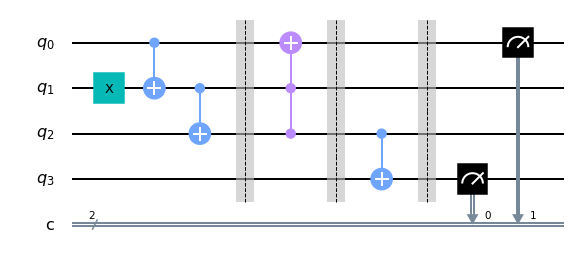

In [8]:
# WRONG!!! 
# Wrong result for 010!!!!

qc = QuantumCircuit(4, 2)

# qc.reset(range(4))
qc.x(1)
# qc.x(2)

# Sum
qc.cx(0, 1)
qc.cx(1, 2)
qc.barrier()
qc.ccx(1, 2, 0)
qc.barrier()
qc.cx(2, 3)
qc.barrier()

# Carry
# qc.cx(0, 1)
# qc.cx(0, 2)
# qc.barrier()
qc.measure([3, 0], [0, 1])

# qc.barrier()

qc.draw('mpl')

In [9]:
backend = Aer.get_backend('qasm_simulator')
execution = execute(experiments = qc, backend = backend, shots = 1024)    
results = execution.result()
counts = results.get_counts()
print(counts)

{'11': 1024}


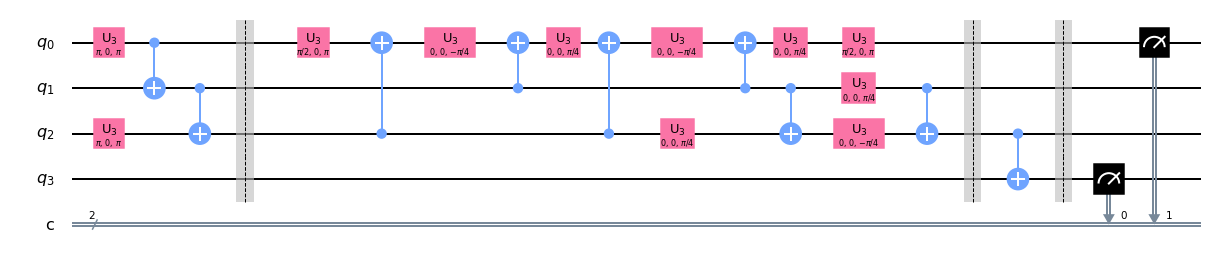

In [18]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 

new_circuit.draw('mpl')

In [15]:
new_circuit.count_ops()

OrderedDict([('u3', 11), ('cx', 9), ('barrier', 3), ('measure', 2)])